In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset/Breast-Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
x = df.iloc[:, 2:]

In [12]:
y = df['diagnosis']

In [14]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler().fit(x).transform(x)

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(scale, y, test_size=.3,
random_state=1014)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression(C=0.01, solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [21]:
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)

In [23]:
print('Score:', np.around(model.score(x_test, y_test)*100, 2), '%')

Score: 96.49 %


In [24]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred, pos_label='B')

0.9491525423728814

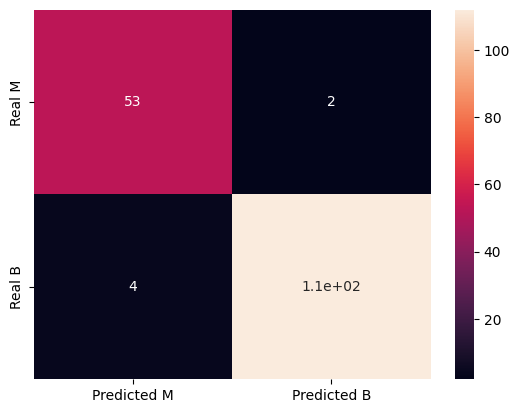

In [25]:
confusion = confusion_matrix(y_test, y_pred, 
                            labels=['M', 'B'])
confusion_df = pd.DataFrame(confusion,
                           index=['Real M', 'Real B'],
                           columns=['Predicted M', 'Predicted B'])
sns.heatmap(confusion_df, annot=True)
plt.show()